# This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 100 # Here I change simulation duration without changing the Configuration file.

In [3]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [4]:
pools = dict()
pools[0] = InterneuronPool(conf, 'RC', 'ext')

Syn = SynapsesFactory(conf, pools)

Interneuron Pool of RC ext built
Synaptic Noise on RC_ext built
All the 350 synapses were built


In [5]:
# The simulation  itself

tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in xrange(len(pools[0].unit)):
        pools[0].unit[j].iInjected = 5
    pools[1].atualizePool(t[i])    
    pools[0].atualizeInterneuronPool(t[i])
    membPotential[i] = pools[0].unit[175].v_mV # This command records the membrane potential of the RC with index 175.
toc = time.clock()
print str(toc - tic) + ' seconds'

38.106539 seconds


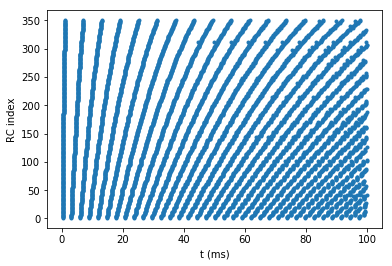

In [6]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

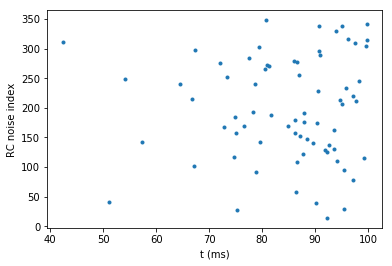

In [7]:
pools[1].listSpikes()

plt.plot(pools[1].poolTerminalSpikes[:, 0],
    pools[1].poolTerminalSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC noise index')

plt.show()

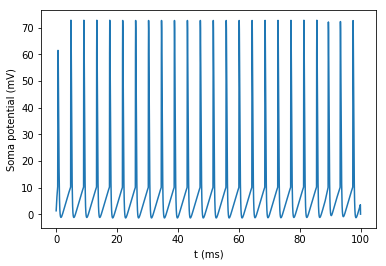

In [8]:
plt.figure()

plt.plot(t, membPotential, '-')

plt.xlabel('t (ms)')
plt.ylabel('Soma potential (mV)')

plt.show()